In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [2]:
data = pd.read_csv('FuelConsumptionCo2.csv')
data.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


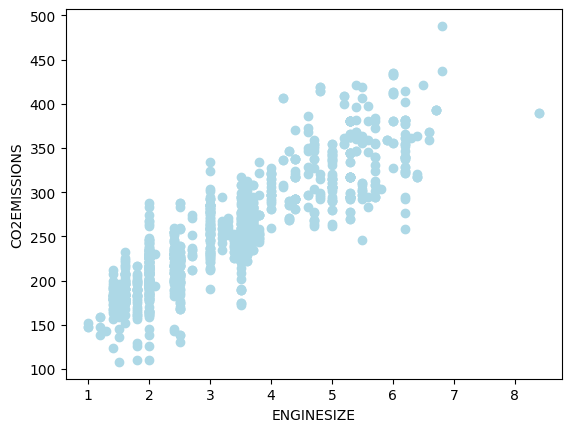

In [3]:
plt.scatter(data['ENGINESIZE'] , data['CO2EMISSIONS'] , color='lightblue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()


In [2]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

NameError: name 'np' is not defined

In [5]:
regr = linear_model.LinearRegression()
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)


LinearRegression()

In [6]:
print ('coefficients : ',regr.coef_) #Slope
print ('Intercept : ',regr.intercept_) #Intercept


coefficients :  [[39.45492153]]
Intercept :  [123.93853673]


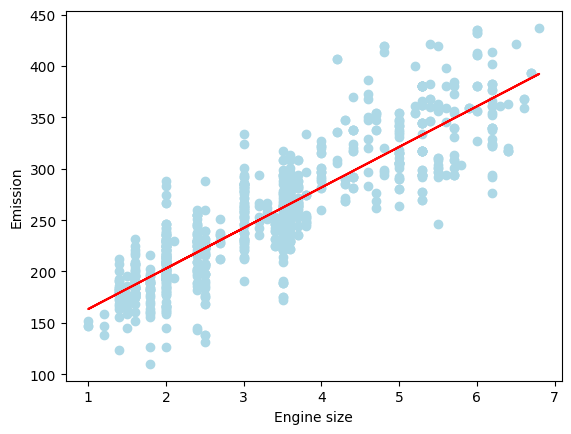

In [7]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='lightblue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.savefig('Linear Regression.png', dpi=300, transparent=True)
    

In [8]:
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values


In [9]:
my_engine_size = 3.5
estimatd_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print ('Estimated Emission :',estimatd_emission)


Estimated Emission : 262.0307620795339


In [10]:
from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
prediction = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Mean sum of squares (MSS): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, prediction) )


Mean absolute error: 24.56
Mean sum of squares (MSS): 1069.68
R2-score: 0.74
